<a href="https://colab.research.google.com/github/Ragm09/RicardoGuerrero/blob/main/Python_Marketing_Comunicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalo Inicializo Librerías**

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import pandas as pd
from textblob import TextBlob

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# **Inicializo Variables**

In [ ]:
text_list = []
neutral_list = []
negative_list = []
positive_list = []
source = []
follower = []
screen_name = []
in_reply_to_status_id = []
in_reply_to_screen_name = []
location = []
friends_count = []
statuses_count = []
created_at = []
created_at_us = []
status_id = []
reply = []
retweet_count = []
favorite_count = []
hashtags = []
user_mentions = []

# **Creamos una función para extraer Tweets y Convertir en DataFrame**

In [ ]:
def df_tweet(user,count):
  guillermo_tweets = tweepy.Cursor(api.user_timeline, screen_name=user).items(count)

  for tweet in guillermo_tweets:
      text_list.append(tweet.text)
      status_id.append(tweet.id_str)
      created_at.append(tweet.created_at)
      source.append(tweet.source)
      in_reply_to_status_id.append(tweet.in_reply_to_status_id_str)
      in_reply_to_screen_name.append(tweet.in_reply_to_screen_name)
      retweet_count.append(tweet.retweet_count)
      favorite_count.append(tweet.favorite_count)
      location.append(tweet.user.location)
      follower.append(tweet.user.followers_count)
      screen_name.append(tweet.user.screen_name)
      friends_count.append(tweet.user.friends_count)
      statuses_count.append(tweet.user.statuses_count)
      created_at_us.append(tweet.user.created_at)

  tw_list = pd.DataFrame()
  tw_list["text"] = text_list
  tw_list["source"] = source
  tw_list["follower"] = follower
  tw_list["screen_name"] = screen_name
  tw_list["in_reply_to_status_id"] = in_reply_to_status_id
  tw_list["in_reply_to_screen_name"] = in_reply_to_screen_name
  tw_list["location"] = location
  tw_list["friends_count"] = friends_count
  tw_list["statuses_count"] = statuses_count
  tw_list["created_at"] = created_at
  tw_list["created_at_us"] = created_at_us
  tw_list["status_id"] = status_id
  tw_list["retweet_count"] = retweet_count
  tw_list["favorite_count"] = favorite_count
  return (tw_list)

# **Extraemos y unimos en un solo DataFrame**

In [ ]:
guillermo = df_tweet("LassoGuillermo",20)
mashi = df_tweet("MashiRafael",20)

In [ ]:
frames = [guillermo, mashi]
tweets = pd.concat(frames)

In [ ]:
tweets.columns

Index(['text', 'source', 'follower', 'screen_name', 'in_reply_to_status_id',
       'in_reply_to_screen_name', 'location', 'friends_count',
       'statuses_count', 'created_at', 'created_at_us', 'status_id',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [ ]:
!pip install wordcloud
!pip install rake-nltk
!pip install spacy-udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.0/937.0 kB 15.6 MB/s eta 0:00:00


In [ ]:
# Carga de librerías
import pickle
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from wordcloud import WordCloud
from rake_nltk import Rake
import nltk
import requests
import spacy_udpipe as udpipe
from nltk.stem import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tweets['word_token'] = [word_tokenize(i) for i in list(tweets.text)]

In [ ]:
tweets.head()

,text,source,follower,screen_name,in_reply_to_status_id,in_reply_to_screen_name,location,friends_count,statuses_count,created_at,created_at_us,status_id,retweet_count,favorite_count,word_token
0,Feliz día a todas las madres. Honramos su vale...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-14 19:46:17+00:00,2011-05-17 17:49:29+00:00,1657834740760694784,422,976,"[Feliz, día, a, todas, las, madres, ., Honramo..."
1,Así es estimado Luis @Almagro_OEA2015. Debemos...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-13 15:04:29+00:00,2011-05-17 17:49:29+00:00,1657401432511856641,204,560,"[Así, es, estimado, Luis, @, Almagro_OEA2015, ..."
2,"Queridas familias ecuatorianas, les hemos escu...",Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-11 16:27:48+00:00,2011-05-17 17:49:29+00:00,1656697625817628683,1382,4473,"[Queridas, familias, ecuatorianas, ,, les, hem..."
3,"Para proteger nuestra industria, productos chi...",Twitter for iPhone,1324238,LassoGuillermo,1656499760902164481,LassoGuillermo,,1401,32374,2023-05-11 03:21:34+00:00,2011-05-17 17:49:29+00:00,1656499764542726144,458,991,"[Para, proteger, nuestra, industria, ,, produc..."
4,Otra buena noticia para el Ecuador. Hoy firmam...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-11 03:21:33+00:00,2011-05-17 17:49:29+00:00,1656499760902164481,1245,3749,"[Otra, buena, noticia, para, el, Ecuador, ., H..."


In [ ]:
# Creamos una función para limpiar datos
def word_tokenize_clean(sentence, to_lower=True, remove_special_chars=True, 
                        remove_numbers=True, remove_stopwords=True):
    token_clean = word_tokenize(sentence)
    if to_lower:
        token_clean = [i.lower() for i in token_clean]
    if remove_special_chars:
        token_clean = [re.sub(r'\W+', '', i) for i in token_clean]
    if remove_numbers:
        token_clean = [re.sub(r'[0-9]+', '', i) for i in token_clean] 
    if remove_stopwords:
        token_clean = [i for i in token_clean if i.lower() not in stopwords.words('spanish')]
    token_clean = [i for i in token_clean if i!='']
    return token_clean

In [ ]:
# Sustituimos la columna que teníamos antes
tweets['word_token'] = [word_tokenize_clean(i) for i in list(tweets.text)]

In [ ]:
tweets.head(2)

,text,source,follower,screen_name,in_reply_to_status_id,in_reply_to_screen_name,location,friends_count,statuses_count,created_at,created_at_us,status_id,retweet_count,favorite_count,word_token
0,Feliz día a todas las madres. Honramos su vale...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-14 19:46:17+00:00,2011-05-17 17:49:29+00:00,1657834740760694784,422,976,"[feliz, día, todas, madres, honramos, valentía..."
1,Así es estimado Luis @Almagro_OEA2015. Debemos...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-13 15:04:29+00:00,2011-05-17 17:49:29+00:00,1657401432511856641,204,560,"[así, estimado, luis, almagro_oea, debemos, bu..."


In [ ]:
# Descargamos el modelo para el idioima español
udpipe.download('es')

Downloaded pre-trained UDPipe model for 'es' language


In [ ]:
# Cargamos el modelo
nlp_model_es = udpipe.load('es')

In [ ]:
# Creamos una función para etiquetar cada documento y formar con ello un dataframe
def udpipe_annotate(nlp_model, data, text, doc_id,
                    to_lower=True, remove_special_chars=True, 
                    remove_numbers=True, remove_stopwords=True):
    df_results = []
    for i in range(0,data.shape[0]):
        doc_i = nlp_model(' '.join(word_tokenize_clean(data.loc[:,text].iloc[i],
                                                       to_lower=to_lower, 
                                                       remove_special_chars=remove_special_chars,
                                                       remove_numbers=remove_numbers, 
                                                       remove_stopwords=remove_stopwords))) 
        doc_id_i = data.loc[:,doc_id].iloc[i]
        data_i = [(doc_id_i, token.text, token.lemma_, token.pos_) for token in doc_i]
        df_i = pd.DataFrame(data_i, columns =['doc_id', 'token', 'lemma', 'pos'])
        df_results.append(df_i)
    result = pd.concat(df_results)
    return result

In [ ]:
tweets_annotated = udpipe_annotate(nlp_model_es, tweets, 'text', 'screen_name', to_lower=False)

In [ ]:
tweets_annotated

,doc_id,token,lemma,pos
0,LassoGuillermo,Feliz,feliz,PROPN
1,LassoGuillermo,día,día,VERB
2,LassoGuillermo,todas,todo,DET
3,LassoGuillermo,madres,madr,NOUN
4,LassoGuillermo,Honramos,Honramo,PROPN
...,...,...,...,...
8,MashiRafael,eternamente,eternamente,ADV
9,MashiRafael,agradecida,agradecido,ADJ
10,MashiRafael,único,único,ADJ
11,MashiRafael,presidente,presidente,NOUN


In [ ]:
# Realizamos el conteo por etiqueta
count_pos = tweets_annotated.groupby('pos', as_index=False).agg({'lemma':"count"}).sort_values('lemma')
count_pos.tail()

,pos,lemma
2,ADV,30
12,VERB,88
0,ADJ,150
7,NOUN,179
10,PROPN,238


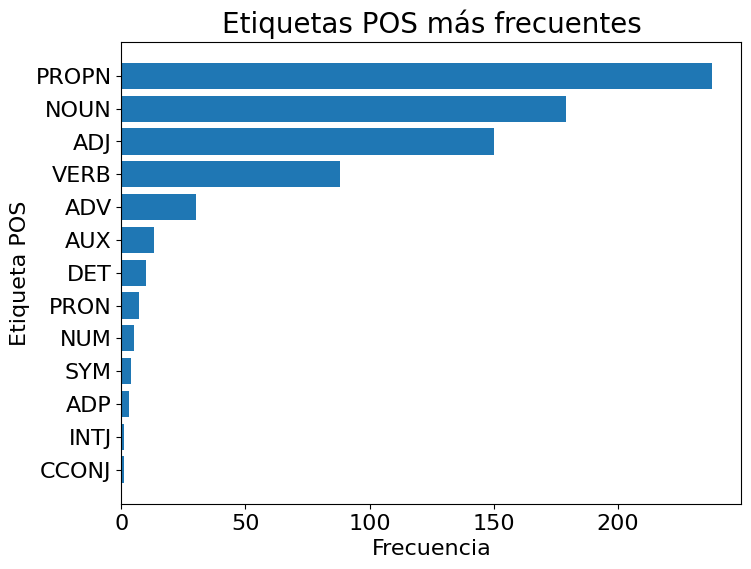

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.barh(count_pos.pos, count_pos.lemma)
plt.ylabel('Etiqueta POS', fontsize = 16)
plt.xlabel('Frecuencia', fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.title('Etiquetas POS más frecuentes', fontsize = 20)
plt.show()

In [ ]:
# Realizamos el conteo por etiqueta y palabra
count_pos_lemma = tweets_annotated.\
    loc[tweets_annotated.pos.isin(['NOUN','VERB','ADJ','PROPN'])].\
    groupby(['pos','lemma'], as_index=False).\
    agg({'doc_id':"count"}).\
    sort_values(['pos','doc_id'], ascending=False).\
    groupby(['pos']).\
    head(5)
count_pos_lemma

,pos,lemma,doc_id
341,VERB,trabajar,5
317,VERB,entregar,4
313,VERB,encontrar,3
338,VERB,seguir,3
345,VERB,vivir,3
264,PROPN,rt,13
254,PROPN,https,10
191,PROPN,Ecuador,7
173,PROPN,Alfonso,4
179,PROPN,Bombolí,4


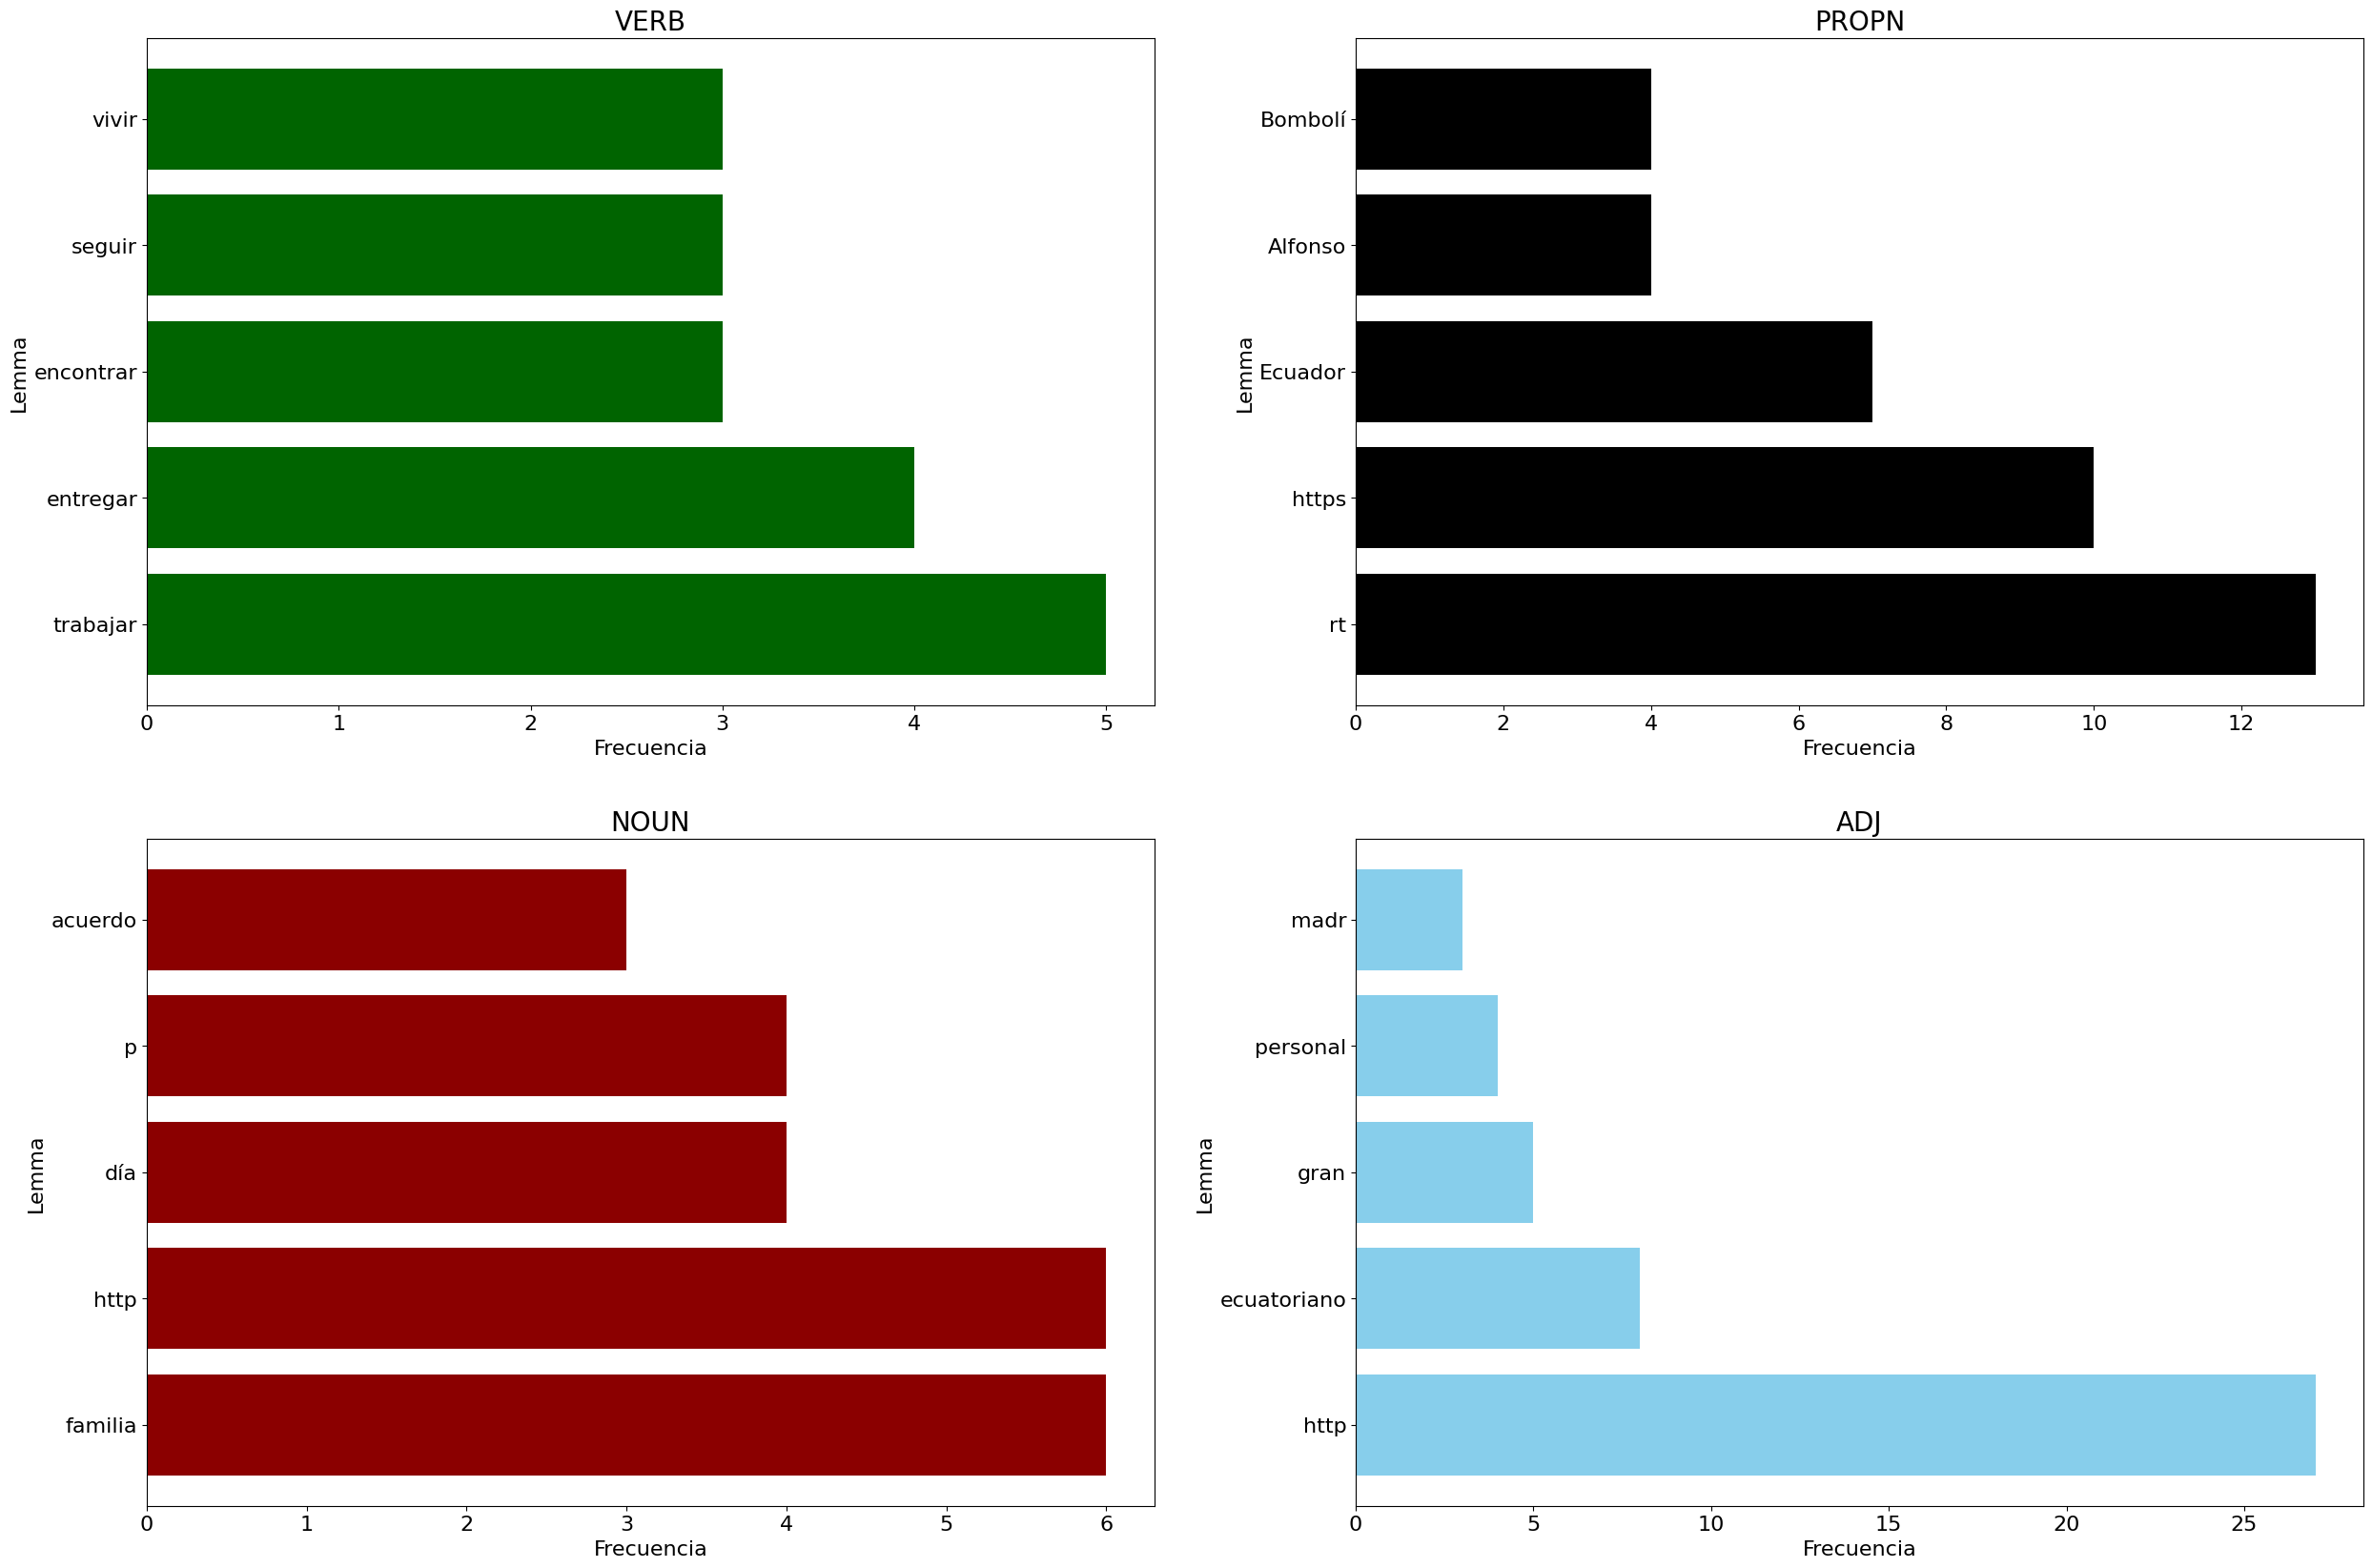

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30,20))
ax1.barh(count_pos_lemma.loc[count_pos_lemma.pos=="VERB","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="VERB","doc_id"],
        color = 'darkgreen')
ax2.barh(count_pos_lemma.loc[count_pos_lemma.pos=="PROPN","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="PROPN","doc_id"],
        color = 'black')
ax3.barh(count_pos_lemma.loc[count_pos_lemma.pos=="NOUN","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="NOUN","doc_id"],
        color = 'darkred')
ax4.barh(count_pos_lemma.loc[count_pos_lemma.pos=="ADJ","lemma"],
         count_pos_lemma.loc[count_pos_lemma.pos=="ADJ","doc_id"],
        color = 'skyblue')
ax1.set_title('VERB', fontsize=20)
ax2.set_title('PROPN', fontsize=20)
ax3.set_title('NOUN', fontsize=20)
ax4.set_title('ADJ', fontsize=20)
for i in [ax1, ax2, ax3, ax4]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('Frecuencia', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

In [ ]:
with open('tweets_annotated.pkl', 'wb') as file:
  pickle.dump(tweets_annotated, file)

In [ ]:
# verbos más frecuentes
tweets_annotated.loc[tweets_annotated.pos=='VERB'].\
    groupby('lemma').\
    agg({'doc_id':'count'}).\
    sort_values(['doc_id'], ascending=False).\
    head()

,doc_id
lemma,
trabajar,5
entregar,4
vivir,3
encontrar,3
seguir,3


In [ ]:
# Escogemos los usuarios
usuario_1 = list(tweets_annotated.doc_id.unique())[0]
usuario_2 = list(tweets_annotated.doc_id.unique())[1]
print(usuario_1)
print(usuario_2)

LassoGuillermo
MashiRafael


In [ ]:
# Agrupamos las palabras más frecuentes por usuario
count_titular_lemma = tweets_annotated.\
    loc[(tweets_annotated.doc_id.isin([usuario_1, usuario_2])) &
       (tweets_annotated.pos.isin(['NOUN','VERB','ADJ','PROPN']))].\
    groupby(['doc_id','pos','lemma'], as_index=False).\
    agg({'token':"count"})
count_titular_lemma['token_perc'] = count_titular_lemma.token/count_titular_lemma.groupby('doc_id').token.transform('sum')
count_titular_lemma = count_titular_lemma.\
    sort_values(['doc_id','token_perc'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
count_titular_lemma

,doc_id,pos,lemma,token,token_perc
325,MashiRafael,PROPN,rt,11,0.052632
206,MashiRafael,ADJ,http,5,0.023923
319,MashiRafael,PROPN,https,4,0.019139
203,MashiRafael,ADJ,gran,3,0.014354
286,MashiRafael,PROPN,Guayaquil,3,0.014354
359,MashiRafael,VERB,seguir,3,0.014354
360,MashiRafael,VERB,trabajar,3,0.014354
214,MashiRafael,ADJ,nuevo,2,0.009569
236,MashiRafael,NOUN,día,2,0.009569
240,MashiRafael,NOUN,gente,2,0.009569


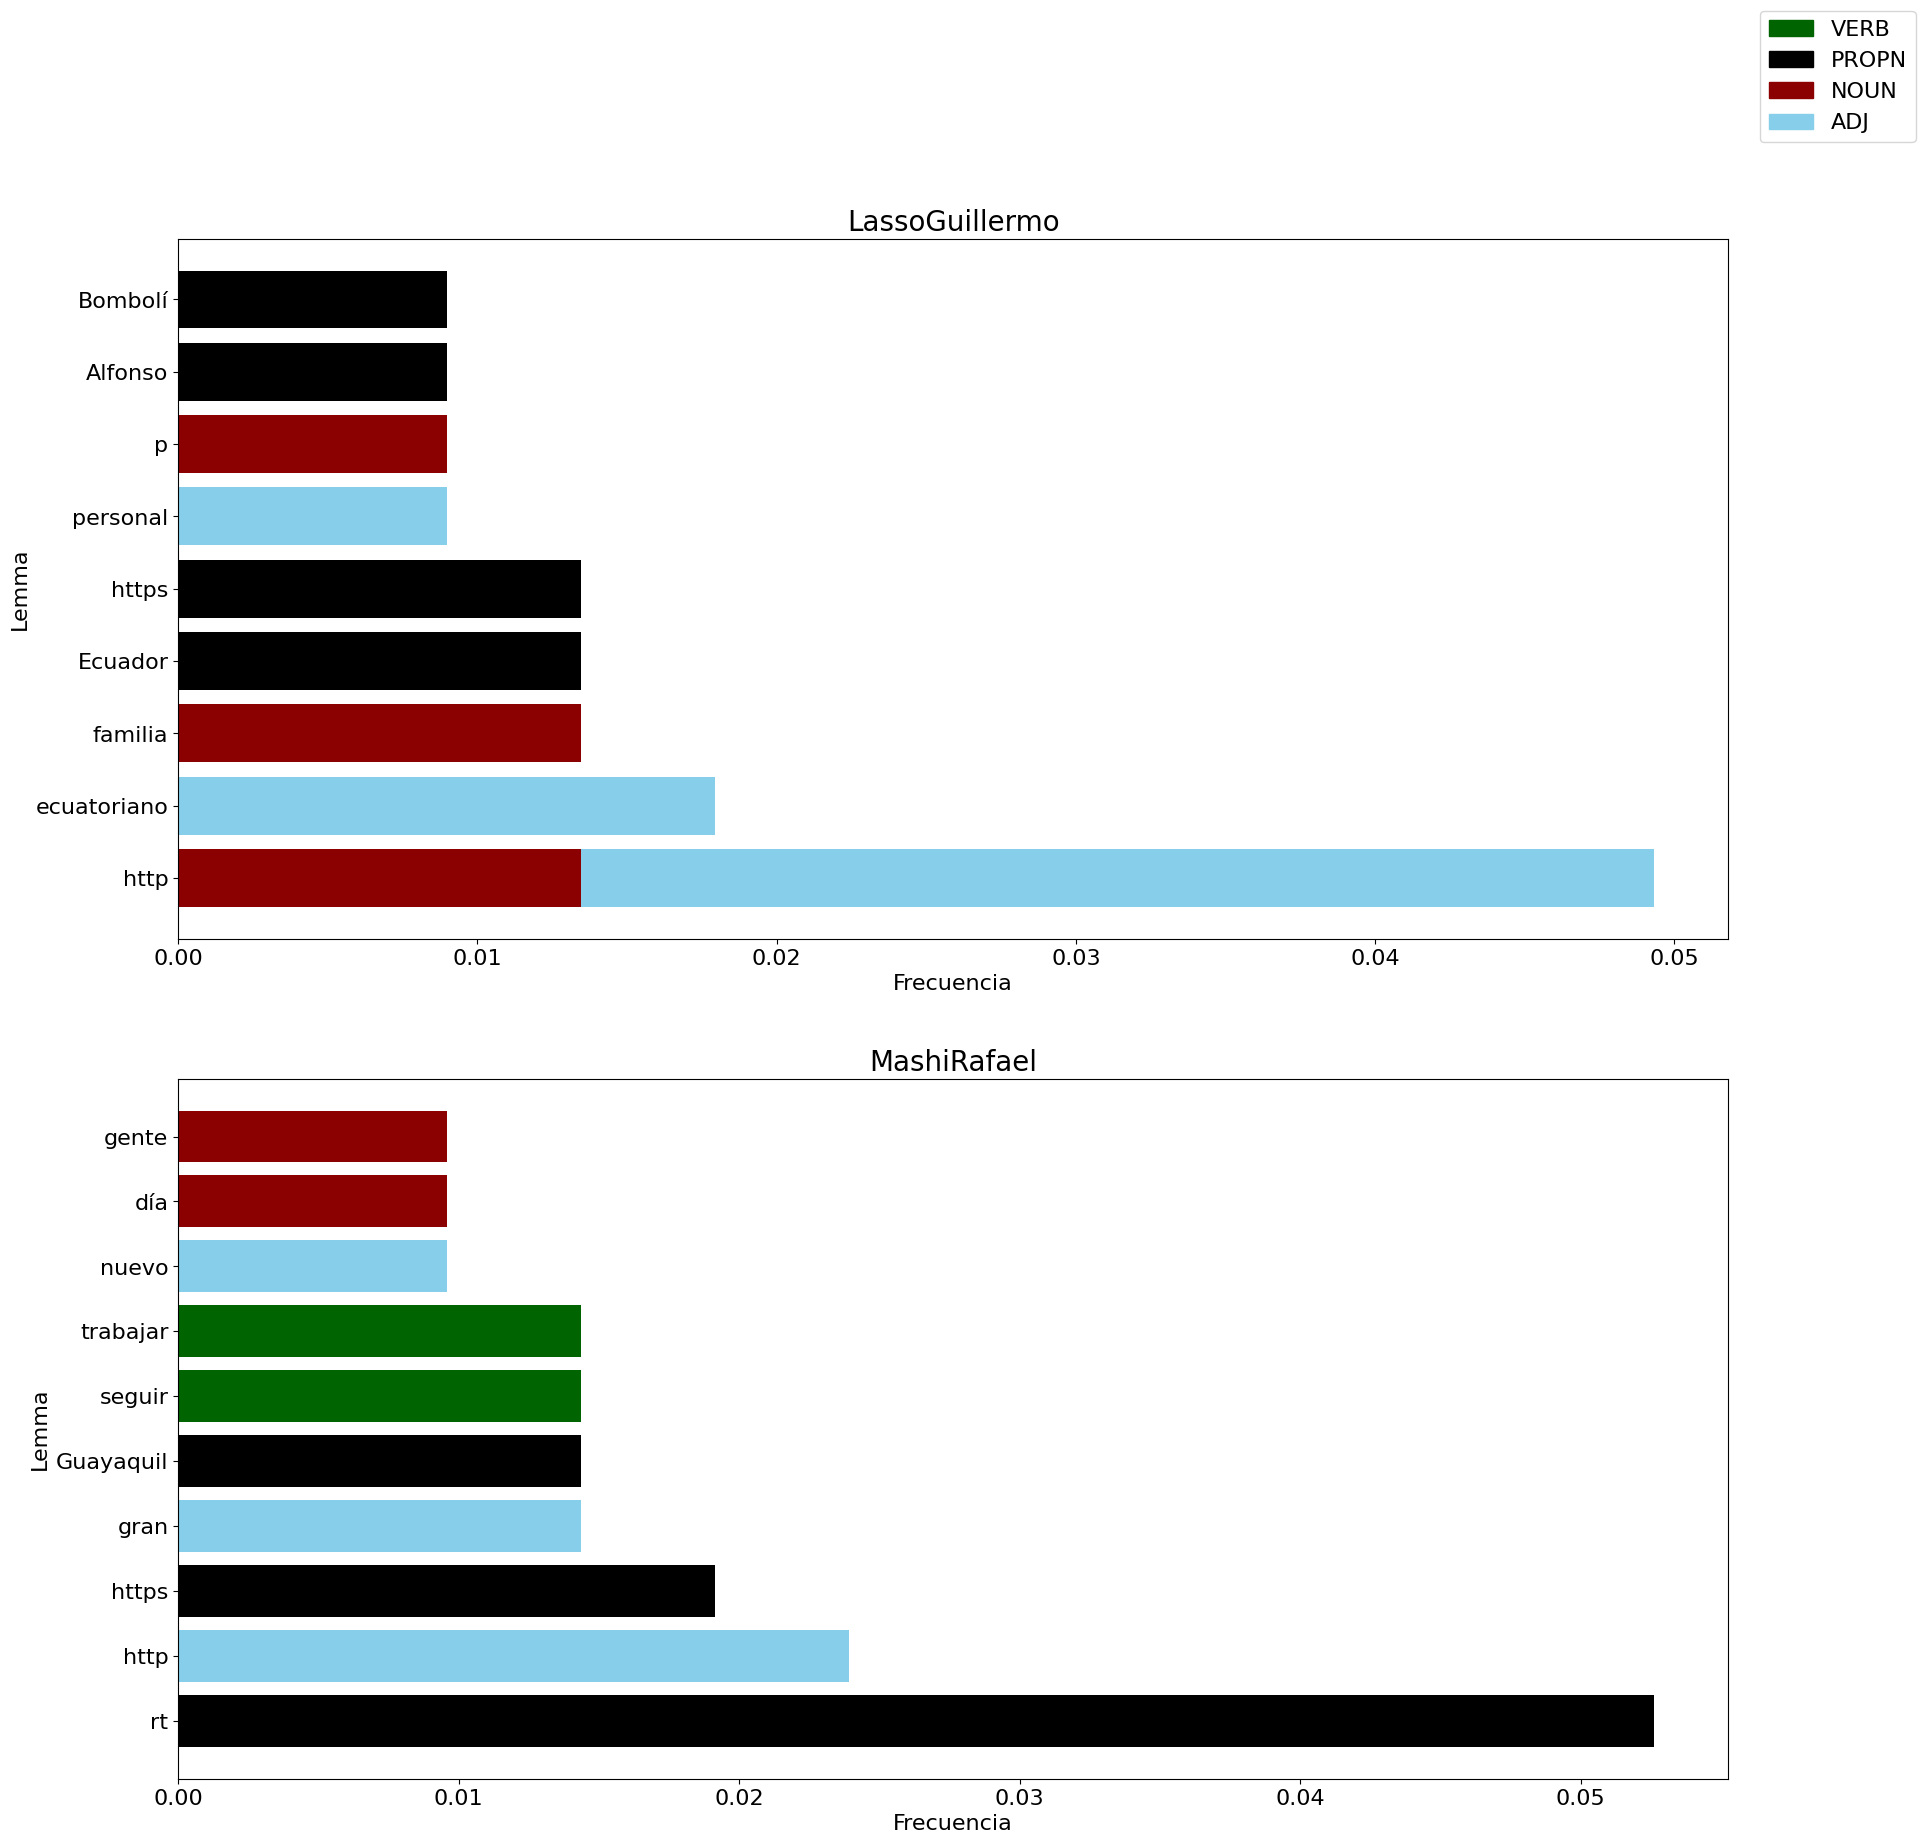

In [ ]:
# Realizamos el gráfico
count_titular_lemma['color'] = 'gray'
count_titular_lemma.loc[count_titular_lemma.pos=='VERB',"color"] = "darkgreen"
count_titular_lemma.loc[count_titular_lemma.pos=='PROPN',"color"] = "black"
count_titular_lemma.loc[count_titular_lemma.pos=='NOUN',"color"] = "darkred"
count_titular_lemma.loc[count_titular_lemma.pos=='ADJ',"color"] = "skyblue"
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_1,"lemma"],
         count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_1,"token_perc"],
         color = count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_1,"color"])
ax2.barh(count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_2,"lemma"],
         count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_2,"token_perc"],
        color = count_titular_lemma.loc[count_titular_lemma.doc_id==usuario_2,"color"])
ax1.set_title(usuario_1, fontsize=20)
ax2.set_title(usuario_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('Frecuencia', fontsize = 16)
    i.tick_params(labelsize = 16)
patch_verb = mpatches.Patch(color='darkgreen', label='VERB')
patch_propn = mpatches.Patch(color='black', label='PROPN')
patch_noun = mpatches.Patch(color='darkred', label='NOUN')
patch_adj = mpatches.Patch(color='skyblue', label='ADJ')
fig.legend(handles = [patch_verb, patch_propn, patch_noun, patch_adj],
          fontsize = 16)
plt.show()

# **TF-IDF**

In [ ]:
# Declaramos el número de documentos
n_documentos = tweets_annotated.doc_id.nunique()
n_documentos

2

In [ ]:
# Calculamos la frecuencia relativa de cada palabra
tf = tweets_annotated.\
    groupby(['doc_id','lemma'], as_index=False).\
    agg({'token':"count"})
tf['token_perc'] = tf.token/tf.groupby('doc_id').token.transform('sum')

In [ ]:
tf.head()

,doc_id,lemma,token,token_perc
0,LassoGuillermo,Academia,2,0.004
1,LassoGuillermo,Alfonso,4,0.008
2,LassoGuillermo,Almagro_OEA,2,0.004
3,LassoGuillermo,Bombolí,4,0.008
4,LassoGuillermo,Bravo,2,0.004


In [ ]:
# Calculamos el número de documentos en los que aparece cada palabra
df = tweets_annotated.\
    groupby(['lemma'], as_index=False).\
    agg({'doc_id':'nunique'})

df.head(5)

,lemma,doc_id
0,Academia,1
1,Administración,1
2,Alcaldía,1
3,Alemania,1
4,Alfonso,1


In [ ]:
# Calculamos el idf
df['idf'] = np.log(n_documentos/df.doc_id)
#df[df["doc_id"]==2].head()
df.head(2)

,lemma,doc_id,idf
0,Academia,1,0.693147
1,Administración,1,0.693147


In [ ]:
# Unimos los datasets y calculamos el tf-idf
tfidf = tf.merge(df.loc[:,['lemma','idf']], on=['lemma'], how='inner')
tfidf['tfidf'] = tfidf.token_perc*tfidf.idf
tfidf.head()

,doc_id,lemma,token,token_perc,idf,tfidf
0,LassoGuillermo,Academia,2,0.004,0.693147,0.002773
1,LassoGuillermo,Alfonso,4,0.008,0.693147,0.005545
2,LassoGuillermo,Almagro_OEA,2,0.004,0.693147,0.002773
3,LassoGuillermo,Bombolí,4,0.008,0.693147,0.005545
4,LassoGuillermo,Bravo,2,0.004,0.693147,0.002773


In [ ]:
# Obtenemos los tf-idf más altos
tfidf_titular_lemma = tfidf.\
    loc[(tfidf.doc_id.isin([usuario_1, usuario_2]))].\
    sort_values(['doc_id','tfidf'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
tfidf_titular_lemma

,doc_id,lemma,token,token_perc,idf,tfidf
244,MashiRafael,Guayaquil,3,0.013100,0.693147,0.009081
358,MashiRafael,seguir,3,0.013100,0.693147,0.009081
232,MashiRafael,Asamblea,2,0.008734,0.693147,0.006054
236,MashiRafael,Consejo,2,0.008734,0.693147,0.006054
247,MashiRafael,Holguin,2,0.008734,0.693147,0.006054
251,MashiRafael,Marcela,2,0.008734,0.693147,0.006054
265,MashiRafael,Vicepresidenta,2,0.008734,0.693147,0.006054
266,MashiRafael,VivianaVeloz,2,0.008734,0.693147,0.006054
278,MashiRafael,aquilesalvarez,2,0.008734,0.693147,0.006054
306,MashiRafael,gente,2,0.008734,0.693147,0.006054


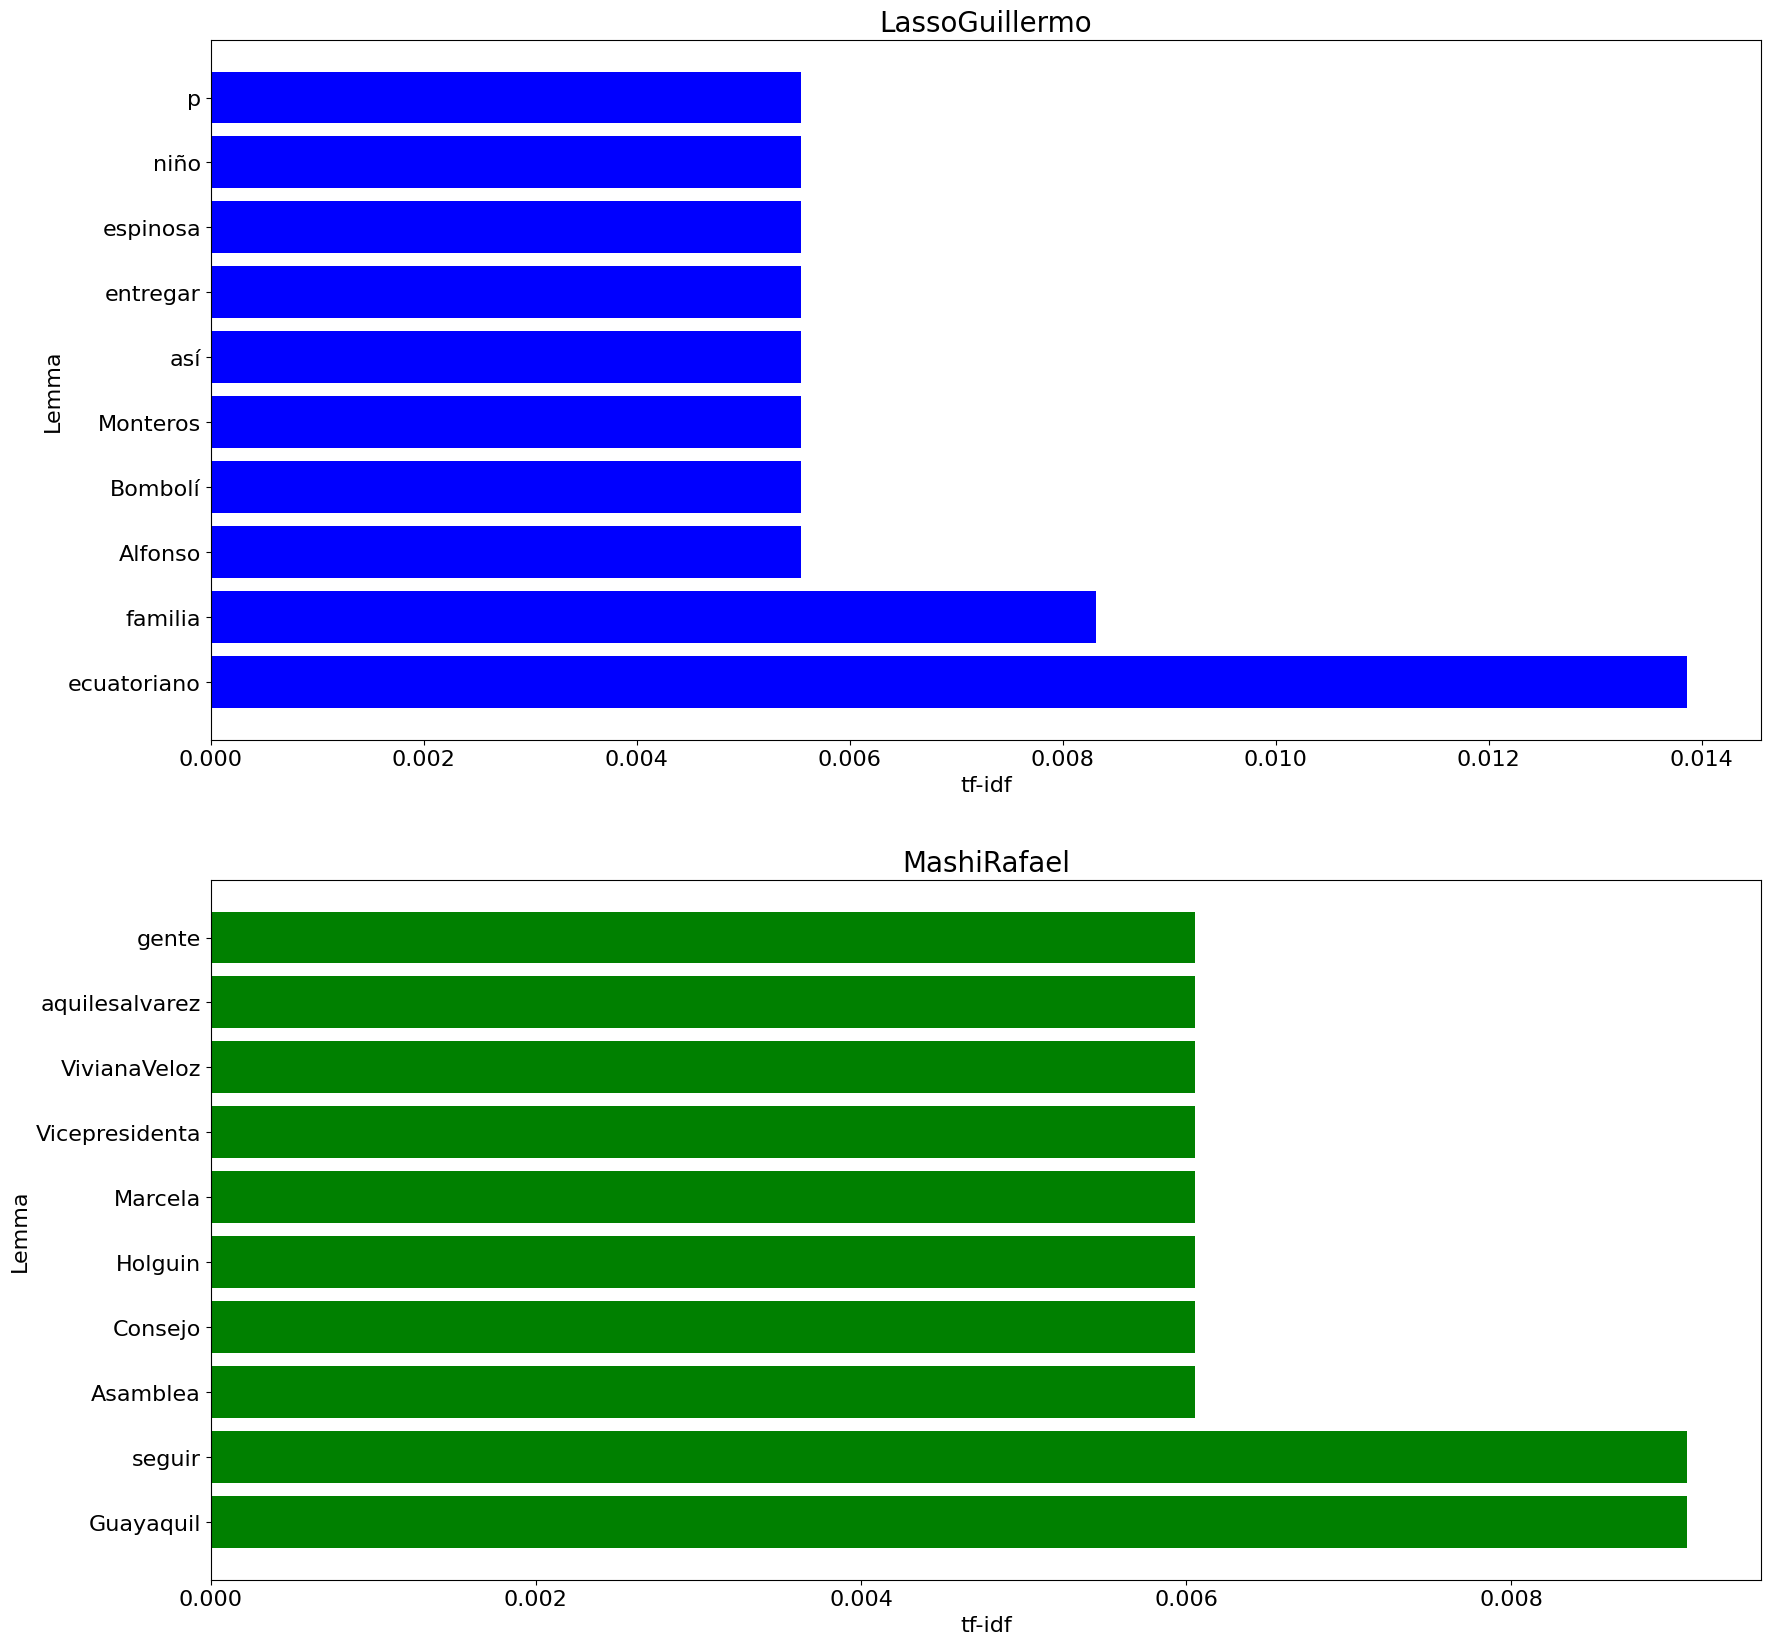

In [ ]:
# Graficamos estas palabras 'únicas'
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==usuario_1,"lemma"],
         tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==usuario_1,"tfidf"],
         color = "blue")
ax2.barh(tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==usuario_2,"lemma"],
         tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==usuario_2,"tfidf"],
        color = 'green')
ax1.set_title(usuario_1, fontsize=20)
ax2.set_title(usuario_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('tf-idf', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

# **n-gramas**

In [ ]:
# Creamos una función de tokenización por documento
def tokenize_ngram_df(data, text, doc_id,  n,
                     to_lower=True, remove_special_chars=True, 
                    remove_numbers=True, remove_stopwords=True):
    df_results = []
    for i in range(0,data.shape[0]):
        text_i = list(data[text])[i]
        doc_id_i = data.loc[:,doc_id].iloc[i]
        data_i = [(doc_id_i,' '.join(list(i))) for i in ngrams(word_tokenize_clean(text_i), n)]
        df_i = pd.DataFrame(data_i, columns =['doc_id', 'ngram'])
        df_results.append(df_i)
    result = pd.concat(df_results)
    return result

In [ ]:
# Ejecutamos la función de tokenización con bigramas
tweets_bigramas = tokenize_ngram_df(tweets, 'text', 'screen_name', 2)
tweets_bigramas.head()

,doc_id,ngram
0,LassoGuillermo,feliz día
1,LassoGuillermo,día todas
2,LassoGuillermo,todas madres
3,LassoGuillermo,madres honramos
4,LassoGuillermo,honramos valentía


In [ ]:
# Bigramas más frecuentes
tweets_bigramas.\
    groupby('ngram').\
    agg({'doc_id':'count'}).\
    sort_values(['doc_id'], ascending=False).\
    head()

,doc_id
ngram,
espinosa monteros,4
alfonso espinosa,4
feliz día,4
p https,4
debe ser,3


In [ ]:
# Declaramos el número de documentos
n_documentos = tweets_bigramas.doc_id.nunique()
n_documentos

2

In [ ]:
# Calculamos la frecuencia relativa de cada bigrama
tweets_bigramas['n'] = 1
tf = tweets_bigramas.\
    groupby(['doc_id','ngram'], as_index=False).\
    agg({'n':'count'})
tf['token_perc'] = tf.n/tf.groupby('doc_id').n.transform('sum')

In [ ]:
# Calculamos el número de documentos en los que aparece cada bigrama
df = tweets_bigramas.\
    groupby(['ngram'], as_index=False).\
    agg({'doc_id':'nunique'})

df

,ngram,doc_id
0,abrazo https,1
1,abre mercado,1
2,academia g,1
3,acción política,1
4,actúen firmeza,1
...,...,...
416,votos favor,1
417,wagner bravo,1
418,zoomecuador urgente,1
419,éxitos querido,1


In [ ]:
# Calculamos el idf
df['idf'] = np.log(n_documentos/df.doc_id)
df

,ngram,doc_id,idf
0,abrazo https,1,0.693147
1,abre mercado,1,0.693147
2,academia g,1,0.693147
3,acción política,1,0.693147
4,actúen firmeza,1,0.693147
...,...,...,...
416,votos favor,1,0.693147
417,wagner bravo,1,0.693147
418,zoomecuador urgente,1,0.693147
419,éxitos querido,1,0.693147


In [ ]:
# Unimos los datasets y calculamos el tf-idf
tfidf = tf.merge(df.loc[:,['ngram','idf']], on=['ngram'], how='inner')
tfidf['tfidf'] = tfidf.token_perc*tfidf.idf
tfidf.tail()

,doc_id,ngram,n,token_perc,idf,tfidf
417,MashiRafael,vocal consejo,1,0.004808,0.693147,0.003332
418,MashiRafael,votos favor,1,0.004808,0.693147,0.003332
419,MashiRafael,zoomecuador urgente,1,0.004808,0.693147,0.003332
420,MashiRafael,éxitos querido,1,0.004808,0.693147,0.003332
421,MashiRafael,único presidente,1,0.004808,0.693147,0.003332


In [ ]:
# Obtenemos los tf-idf más altos
tfidf_titular_bigrama = tfidf.\
    loc[(tfidf.doc_id.isin([usuario_1, usuario_2]))].\
    sort_values(['doc_id','tfidf'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
tfidf_titular_bigrama

,doc_id,ngram,n,token_perc,idf,tfidf
239,MashiRafael,asamblea nacional,2,0.009615,0.693147,0.006665
283,MashiRafael,gestión marcela,2,0.009615,0.693147,0.006665
288,MashiRafael,gran gestión,2,0.009615,0.693147,0.006665
297,MashiRafael,holguin seguirá,2,0.009615,0.693147,0.006665
327,MashiRafael,marcela holguin,2,0.009615,0.693147,0.006665
337,MashiRafael,nacional https,2,0.009615,0.693147,0.006665
362,MashiRafael,ratifica gran,2,0.009615,0.693147,0.006665
390,MashiRafael,seguirá vicepresidenta,2,0.009615,0.693147,0.006665
410,MashiRafael,vicepresidenta asamblea,2,0.009615,0.693147,0.006665
224,MashiRafael,acción política,1,0.004808,0.693147,0.003332


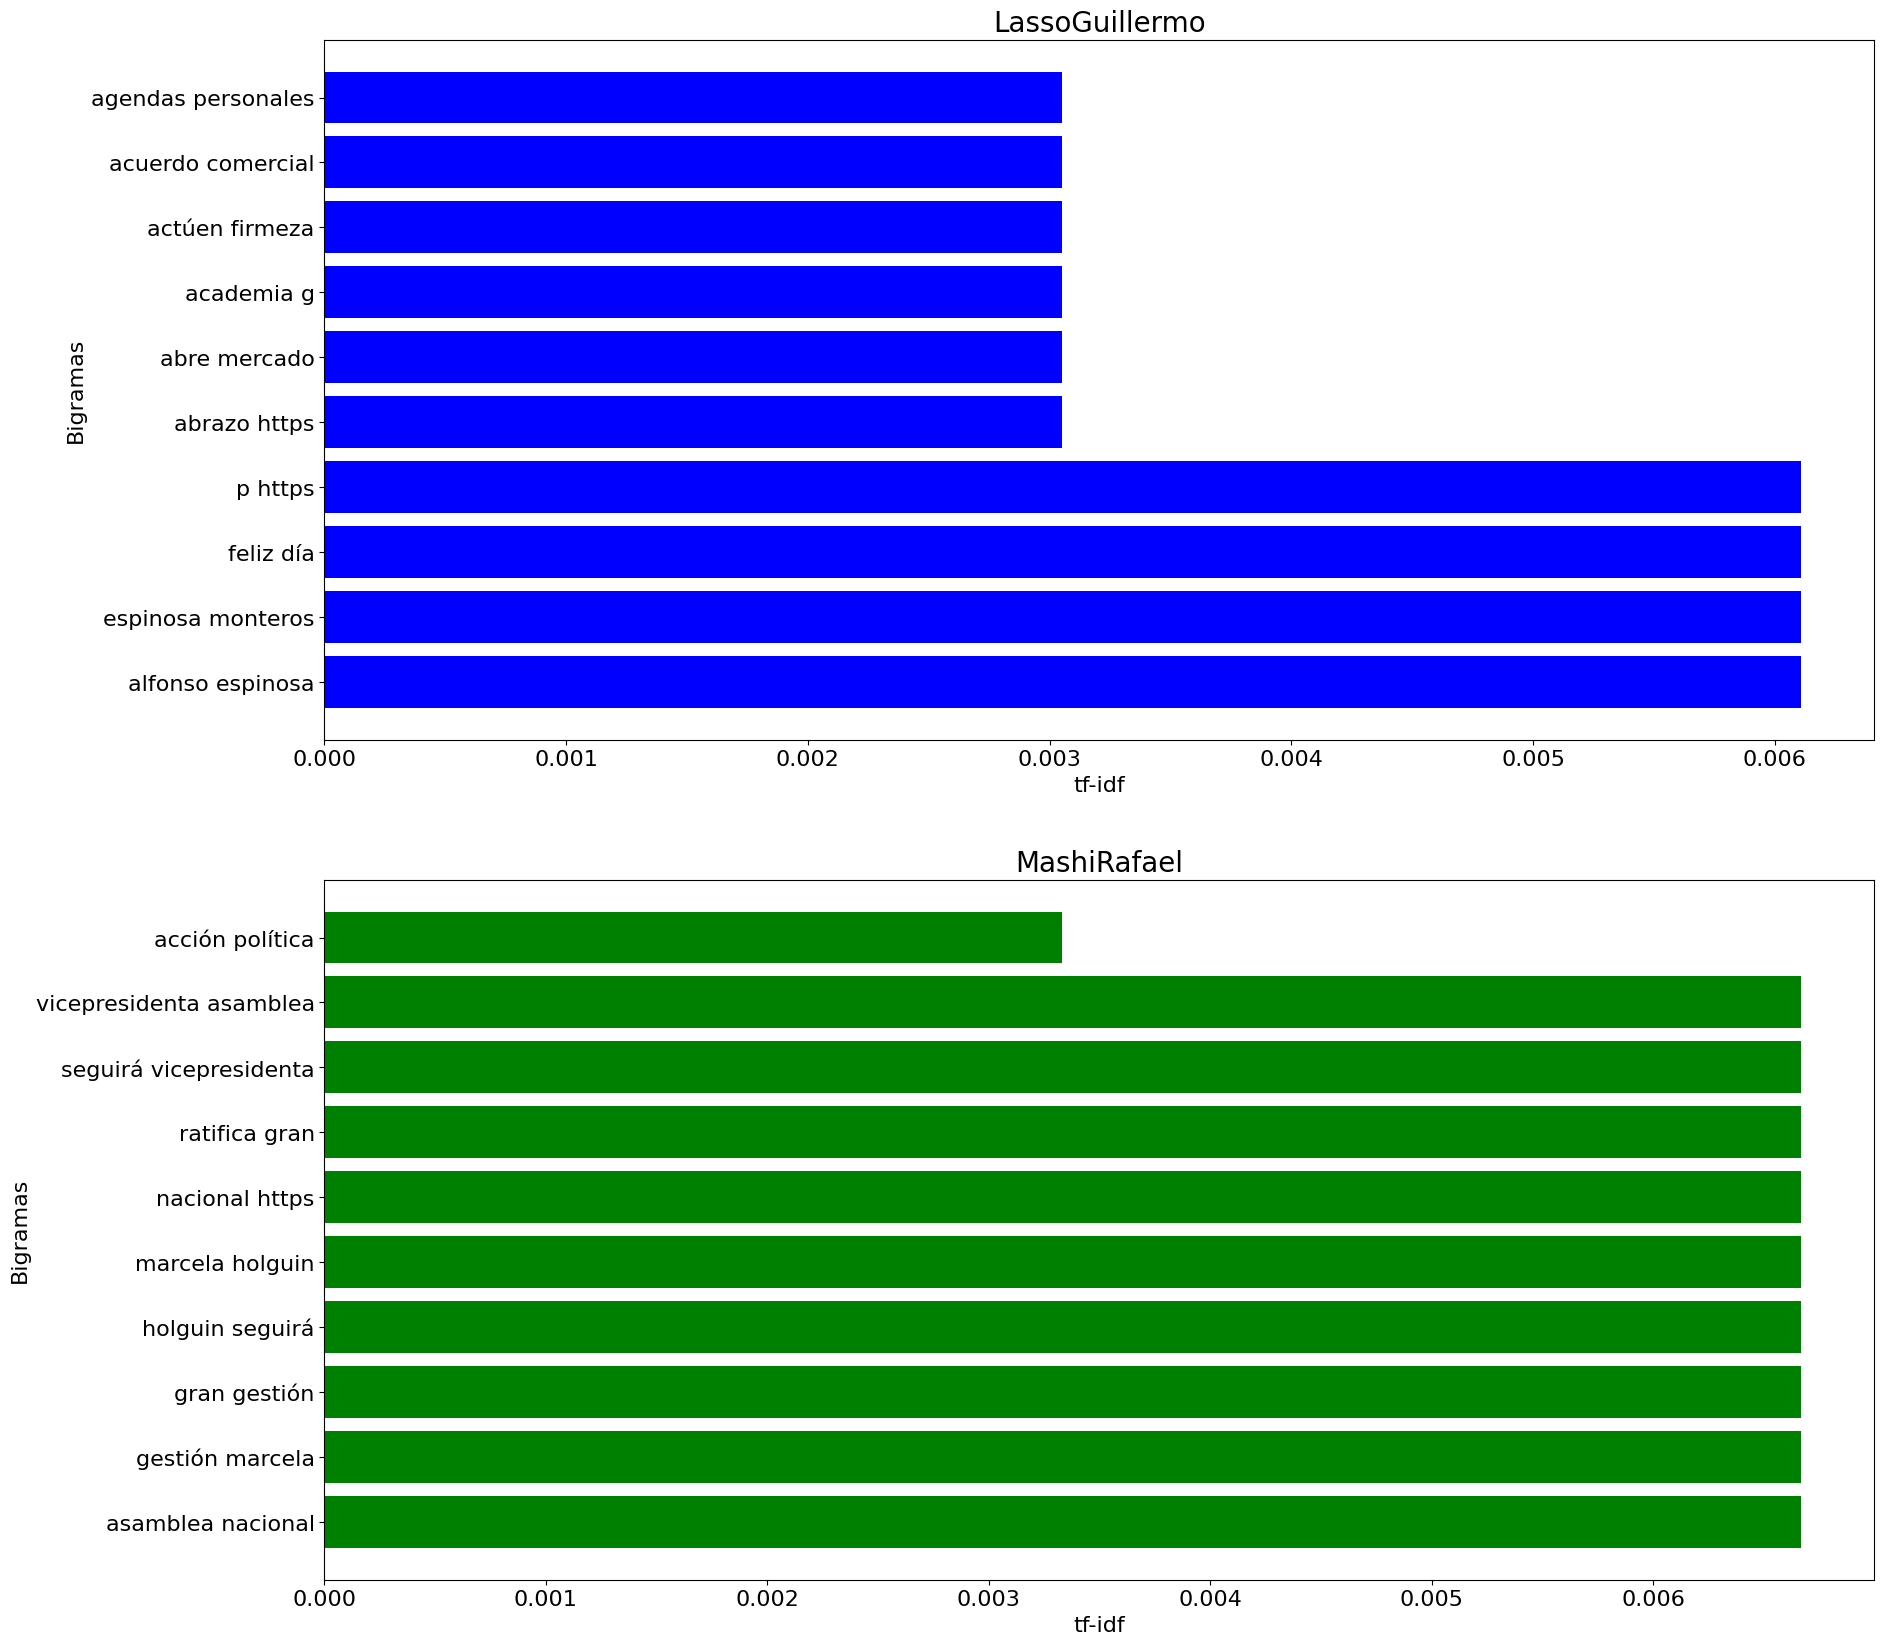

In [ ]:
# Graficamos estas palabras 'únicas'
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==usuario_1,"ngram"],
         tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==usuario_1,"tfidf"],
         color = "blue")
ax2.barh(tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==usuario_2,"ngram"],
         tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==usuario_2,"tfidf"],
        color = 'green')
ax1.set_title(usuario_1, fontsize=20)
ax2.set_title(usuario_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Bigramas', fontsize = 16)
    i.set_xlabel('tf-idf', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

# **Nubes de palabras**

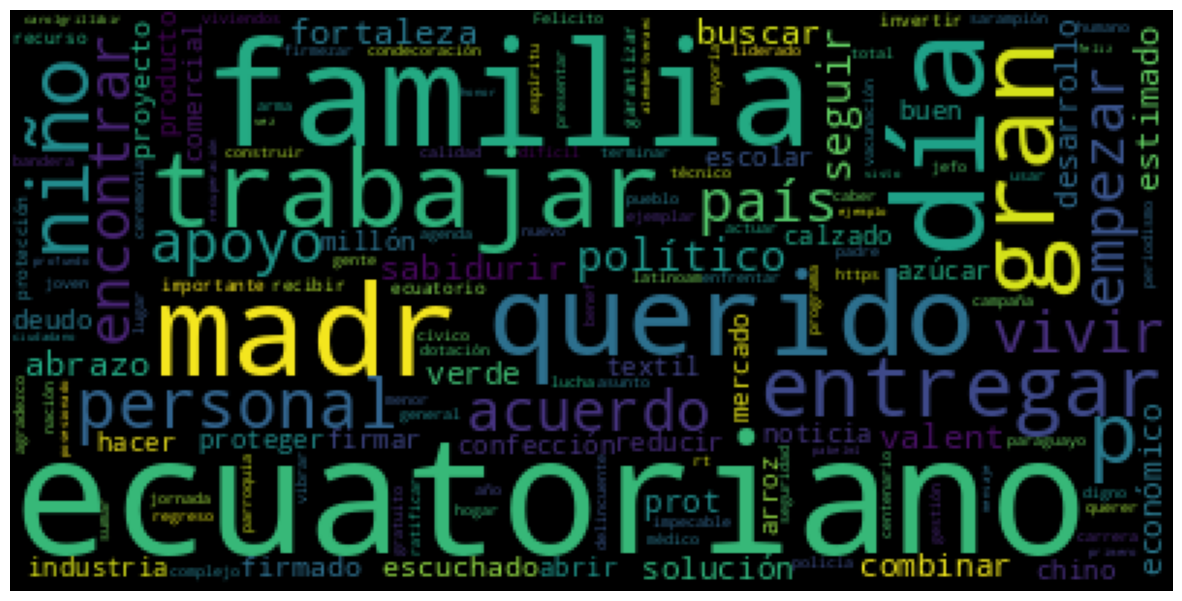

In [ ]:
wc = WordCloud().generate(' '.join(tweets_annotated.loc[tweets_annotated.pos.isin(['VERB','PNOUN','NOUN','ADJ']),'lemma']))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Extracción de palabras clave**

**RAKE**

In [ ]:
# Inicializamos Rake en nltk
rake_nltk = Rake(language='spanish', max_length=2, stopwords = stopwords.words('spanish'))
type(rake_nltk)

rake_nltk.rake.Rake

In [ ]:
# Extraemos las palabras clave para un ejemplo
rake_nltk.extract_keywords_from_text(list(tweets.text)[10])
keyword_extracted = rake_nltk.get_ranked_phrases()
keyword_extracted[0:5]

['gran nación', 'trabajamos', 'país', 'familias', 'construimos']

In [ ]:
# Creamos una función que extraiga la idea principal de cada documento
def rake_lista_documentos(data, text):
    rake_nltk = Rake(language='spanish', max_length=3, stopwords = stopwords.words('spanish'))
    keywords = []
    for i in range(0,data.shape[0]):
        rake_nltk.extract_keywords_from_text(list(data[text])[i])
        keyword_extracted = rake_nltk.get_ranked_phrases()
        keywords.append(keyword_extracted[0])
    data['keywords'] = keywords
    return data

In [ ]:
tweets_df_kw = rake_lista_documentos(tweets, 'text')
tweets_df_kw.head(2)

,text,source,follower,screen_name,in_reply_to_status_id,in_reply_to_screen_name,location,friends_count,statuses_count,created_at,created_at_us,status_id,retweet_count,favorite_count,word_token,keywords
0,Feliz día a todas las madres. Honramos su vale...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-14 19:46:17+00:00,2011-05-17 17:49:29+00:00,1657834740760694784,422,976,"[feliz, día, todas, madres, honramos, valentía...",feliz día querida
1,Así es estimado Luis @Almagro_OEA2015. Debemos...,Twitter for iPhone,1324238,LassoGuillermo,None,None,,1401,32374,2023-05-13 15:04:29+00:00,2011-05-17 17:49:29+00:00,1657401432511856641,204,560,"[así, estimado, luis, almagro_oea, debemos, bu...",combinen desarrollo económico


In [ ]:
for i in range(0,10):
    print('Usuario: '+tweets_df_kw.loc[:,'screen_name'].iloc[i])
    print('Palabras clave: '+tweets_df_kw.loc[:,'keywords'].iloc[i])

Usuario: LassoGuillermo
Palabras clave: feliz día querida
Usuario: LassoGuillermo
Palabras clave: combinen desarrollo económico
Usuario: LassoGuillermo
Palabras clave: queridas familias ecuatorianas
Usuario: LassoGuillermo
Palabras clave: productos chinos
Usuario: LassoGuillermo
Palabras clave: hoy firmamos
Usuario: LassoGuillermo
Palabras clave: hoy hicimos historia
Usuario: LassoGuillermo
Palabras clave: entregamos 247 casas
Usuario: LassoGuillermo
Palabras clave: orden nacional
Usuario: LassoGuillermo
Palabras clave: niñas menores
Usuario: LassoGuillermo
Palabras clave: termina hoy


# **Ejericio con OPEN AI**

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.4 MB/s eta 0:00:00


In [ ]:
import os
import openai

# Load your API key from an environment variable or secret management service
openai.api_key = ""

In [ ]:
# list engines
engines = openai.Engine.list()

# print the first engine's id
print(engines["data"][0:3])


[<Engine engine id=whisper-1 at 0x7f0b3bd03150> JSON: {
  "created": null,
  "id": "whisper-1",
  "object": "engine",
  "owner": "openai-internal",
  "permissions": null,
  "ready": true
}, <Engine engine id=babbage at 0x7f0b3bd03830> JSON: {
  "created": null,
  "id": "babbage",
  "object": "engine",
  "owner": "openai",
  "permissions": null,
  "ready": true
}, <Engine engine id=davinci at 0x7f0b3bd022f0> JSON: {
  "created": null,
  "id": "davinci",
  "object": "engine",
  "owner": "openai",
  "permissions": null,
  "ready": true
}]


In [ ]:
# create a completion
response = openai.Completion.create(
  engine="text-davinci-003",
  prompt="Escribe un tweet para promocionar un carro 4x4 modelo 2023 chevrolet",
  temperature=0.5,
  max_tokens=140
)

In [ ]:
# print the completion
print(response.choices[0].text)



¡Descubre el nuevo #Chevrolet4x4 2023! Un vehículo con estilo y tecnología de vanguardia para una experiencia de manejo única. ¡No te lo pierdas! #Chevrolet #Nuevo4x4 #ExperienciaDeManejo


In [ ]:
text = tweets.head(1)["text"][0]
text

'Feliz día a todas las madres. Honramos su valentía, fortaleza y sabiduría. \nFeliz día querida @MLAlcivar, un abrazo… https://t.co/SRg7mr9mXO'

In [ ]:
response = openai.Completion.create(
  model="text-davinci-003",
  prompt="Decide whether a Tweet's sentiment is positive, neutral, or negative.\n\nTweet: \""+text+"\"\nSentiment:",
  temperature=0,
  max_tokens=60,
  top_p=1.0,
  frequency_penalty=0.5,
  presence_penalty=0.0
)

In [ ]:
response

<OpenAIObject text_completion id=cmpl-7GKY1FsVACrfWOvR6wagdhZT08pAE at 0x7f0b3bddb830> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": " Positive"
    }
  ],
  "created": 1684126589,
  "id": "cmpl-7GKY1FsVACrfWOvR6wagdhZT08pAE",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 1,
    "prompt_tokens": 88,
    "total_tokens": 89
  }
}